# **TRỰC QUAN HÓA DỮ LIỆU**

---

Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu từ file đã được tiền xử lý

In [2]:
#df_clean = pd.read_csv('../Data/StudentPerformanceFactors_clean.csv')
df_clean = pd.read_csv('StudentPerformanceFactors_clean.csv')
df_clean.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Câu 1: Sự ảnh hưởng của hoạt động ngoại khóa lên thành tích học tập 

### Tiền xử lý
- Để trả lời câu hỏi này, nhóm sẽ nhóm thông tin về 2 cột điểm thi là  **Exam_Score** và **Previous_Scores** theo cột **Extracurricular_Activities** để tìm xem nhóm nào có điểm cao hơn.

In [3]:
finalExam_extraActivity_data = df_clean.loc[df_clean['Extracurricular_Activities'] == 'Yes', 'Exam_Score']
preExam_extraActivity_data = df_clean.loc[df_clean['Extracurricular_Activities'] == 'No', 'Exam_Score']

### Trực quan hóa

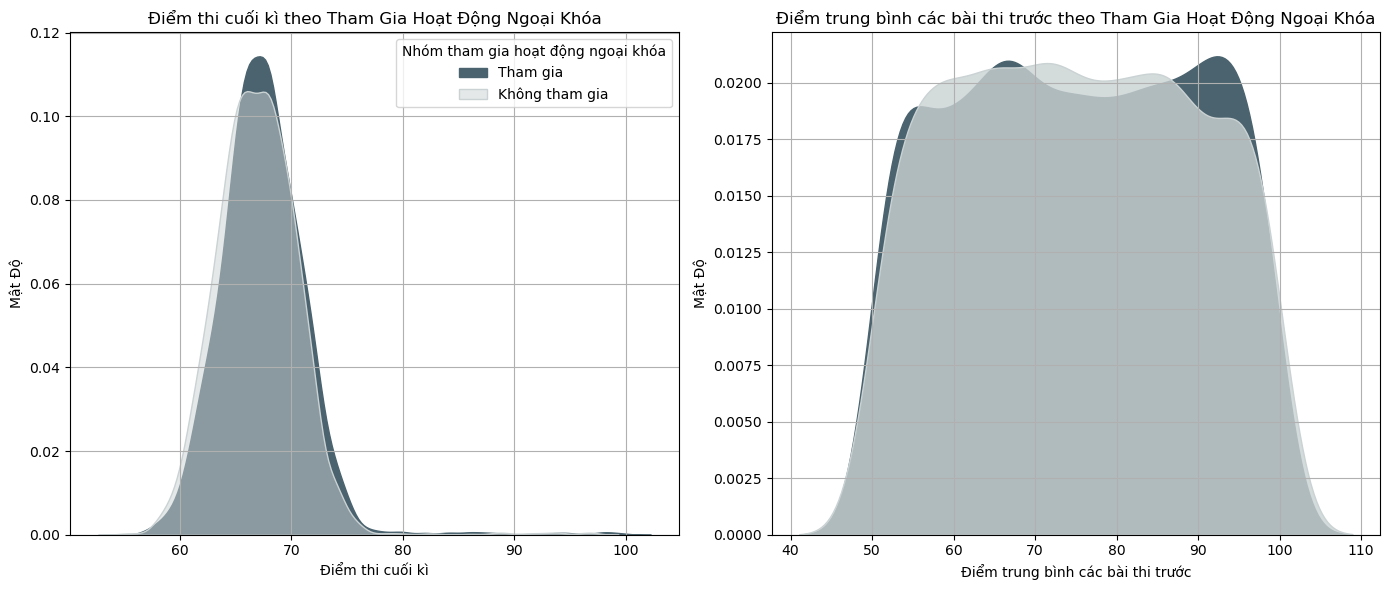

In [4]:
# Vẽ biểu đồ KDE cho từng nhóm
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.kdeplot(finalExam_extraActivity_data, label='Tham gia', color='#4A636E', fill=True, alpha=1, ax=axes[0])
sns.kdeplot(preExam_extraActivity_data, label='Không tham gia', color='#CAD2D3', fill=True, alpha=0.5, ax= axes[0])

axes[0].set_title('Điểm thi cuối kì theo Tham Gia Hoạt Động Ngoại Khóa')
axes[0].set_xlabel('Điểm thi cuối kì')
axes[0].set_ylabel('Mật Độ')
axes[0].legend(title='Nhóm tham gia hoạt động ngoại khóa')
axes[0].grid()

sns.kdeplot(df_clean.loc[df_clean['Extracurricular_Activities'] == 'Yes', 'Previous_Scores'], 
             label='Tham gia', color='#4A636E', fill=True, alpha=1, ax=axes[1])  # Màu sáng
sns.kdeplot(df_clean.loc[df_clean['Extracurricular_Activities'] == 'No', 'Previous_Scores'], 
             label='Không tham gia', color='#CAD2D3', fill=True, alpha=0.8, ax=axes[1])  # Màu cam đậm

axes[1].set_title('Điểm trung bình các bài thi trước theo Tham Gia Hoạt Động Ngoại Khóa')
axes[1].set_xlabel('Điểm trung bình các bài thi trước')
axes[1].set_ylabel('Mật Độ')
axes[1].grid()

plt.tight_layout()
plt.show()

- Nhận xét: 
    + Ở biều đồ thứ nhất: Cả hai nhóm đều có đỉnh phân phối ở khoảng 70 điểm, cho thấy phần lớn học sinh trong cả hai nhóm có điểm thi cuối kỳ gần tương đương nhau. Tuy nhiên, nhóm tham gia hoạt động ngoại khóa có mật độ đỉnh cao hơn một chút ở điểm này, cho thấy có nhiều học sinh ở nhóm này đạt điểm gần mức trung bình hơn so với nhóm không tham gia.

    + Ở biểu đò thứ hai: Phân phối điểm của nhóm học sinh không tham gia hoạt động ngoại khóa tương đối đều. Ngược lại, nhóm học sinh tham gia hoạt động ngoại khóa có sự khác biệt lớn hơn về kết quả học tập với 2 đỉnh ở khoảng 60-70 điểm và 90-100 điểm. 

- Kết luận: 
    + Nhìn chung, sự tham gia vào hoạt động ngoại khóa không tạo ra sự chênh lệch đáng kể về điểm thi giữa hai nhóm. Nhóm học sinh có tham gia hoạt động ngoại khóa có tỉ lệ đạt điểm cao nhiều hơn nhóm học sinh còn lại một chút.

    + Nhóm học sinh có tham gia hoạt động ngoại khóa có sự chênh lệnh về kết quả học tập tương đối rõ ràng. Điều này cho thấy rằng việc tham gia hoạt động ngoại khóa mang lại ảnh hưởng theo cả hai chiều tích cực lẫn tiêu cực đến việc học.


### Câu 2: Ảnh hưởng từ các nhân tố trong môi trường học tập lên động lực học của học sinh

### Tiền xử lý
- Để thể hiện mối liên hệ này, nhóm sẽ lấy thông tin của 3 cột là **Peer_Influence**, **Teacher_Quality** và **Motivation_Level**. 

- Trước khi trực quan hóa dữ liệu, nhóm sẽ thực hiện sắp xếp dữ liệu của các cột theo thứ tự mà nhóm đã chọn để phần hiển thị được rõ ràng hơn.

In [5]:
peer_order = ['Negative', 'Neutral', 'Positive']
motivation_order = ['Low', 'Medium', 'High']
teacher_quality_order = ['Low', 'Medium', 'High']

df_clean['Peer_Influence'] = pd.Categorical(df_clean['Peer_Influence'], categories=peer_order, ordered=True)
df_clean['Motivation_Level'] = pd.Categorical(df_clean['Motivation_Level'], categories=motivation_order, ordered=True)
df_clean['Teacher_Quality'] = pd.Categorical(df_clean['Teacher_Quality'], categories=teacher_quality_order, ordered=True)

- Nhóm chọn tỉ lệ làm thước đo để trực quan hóa 2 tương quan giữa **Peer_Influence** và **Teacher_Quality** với **Motivation_Level**.

In [6]:
peer_count_data = df_clean.groupby(['Peer_Influence', 'Motivation_Level']).size().unstack()
peer_percentage_data = peer_count_data.div(peer_count_data.sum(axis=1), axis=0) * 100

teacher_count_data = df_clean.groupby(['Teacher_Quality', 'Motivation_Level']).size().unstack()
teacher_percentage_data = teacher_count_data.div(teacher_count_data.sum(axis=1), axis=0) * 100

### Trực quan hóa

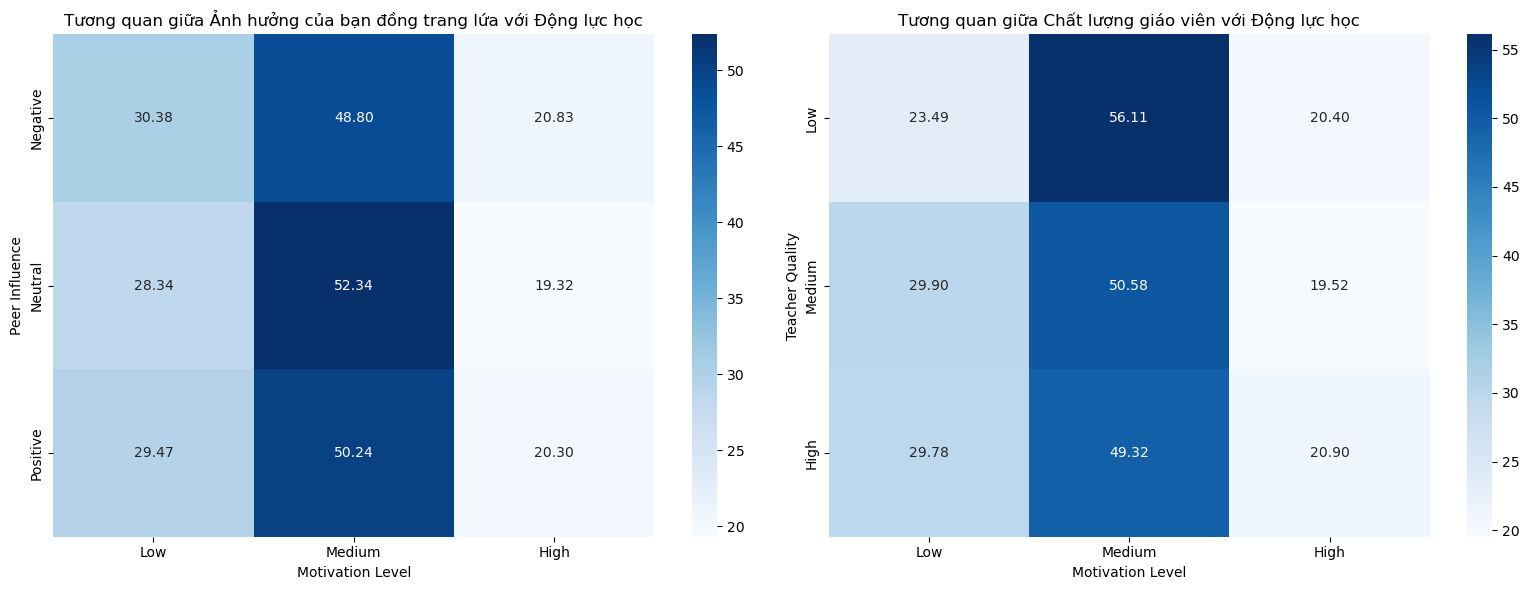

In [7]:
# Vẽ biều đồ heatmap cho từng tương quan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(peer_percentage_data, annot=True, fmt=".2f", cmap="Blues", ax=axes[0])
axes[0].set_title('Tương quan giữa Ảnh hưởng của bạn đồng trang lứa với Động lực học')
axes[0].set_ylabel('Peer Influence')
axes[0].set_xlabel('Motivation Level')

sns.heatmap(teacher_percentage_data, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title('Tương quan giữa Chất lượng giáo viên với Động lực học')
axes[1].set_ylabel('Teacher Quality')
axes[1].set_xlabel('Motivation Level')

plt.tight_layout()
plt.show()


- Nhận xét: 
    + Ở biểu đồ thứ nhất: Nhóm có động lực học "Medium" chiếm tỷ lệ cao nhất trên tổng thể dữ liệu. Ở các nhóm học sinh không có sự khác biệt đáng kể về động lực học theo ảnh hưởng từ bạn đồng trang lứa.

    + Ở biều đồ thứ hai: Cũng tương tự biều đồ thứ nhất. Tuy nhiên tỉ lệ động lực học thấp ở 2 nhóm học sinh học với giáo viên có chất lượng cao (29.78%) và trung bình (29.90%) lại cao hơn đáng kể so với nhóm học sinh học với giáo viên chất lượng thấp (23.49%).  

- Kết luận:
    + Động lực học của học sinh có chịu ảnh hưởng bởi yếu tố con người trong môi trường học tập. Tuy nhiên đây không phải là yếu tố duy nhất ảnh hưởng tới điều đó. Đa số học sinh có động lực học ở mức trung bình, mức động lực học cao chỉ nằm trong khoảng ~ 20% học sinh.

    + Ảnh hưởng của bạn đồng trang lứa: Có vẻ như ảnh hưởng của bạn đồng trang lứa có tác động nhất định tới mức độ động lực học, nhưng mức độ ảnh hưởng "Negative" và "Positive" không làm tăng hay giảm đáng kể động lực học lên mức "High". 

    + Chất lượng giáo viên: Chất lượng giáo viên có liên quan đến động lực học. Trong môi trường giáo viên chất lượng "Low", học sinh tự thúc đẩy để duy trì động lực ở mức trung bình nhưng ít đạt đến động lực học cao. Trong môi tường giáo viên có chất "Medium" và "High", vì một vài nguyên do nào đó mà dẫn tới việc tỉ lệ học sinh có động lực học thấp lại nhiều hơn. 


### Câu 3: Mức thu nhập của gia đình có ảnh hưởng gì đến điểm thi? 

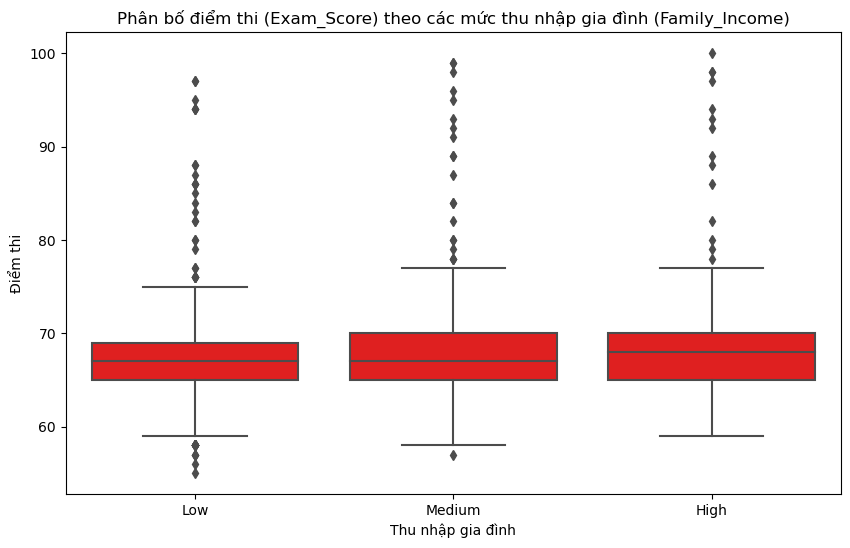

In [8]:
# Định nghĩa hàm vẽ box plot
def plot_exam_score_by_family_income(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Family_Income', y='Exam_Score', data=data, color='red')
    plt.title('Phân bố điểm thi (Exam_Score) theo các mức thu nhập gia đình (Family_Income)')
    plt.xlabel('Thu nhập gia đình')
    plt.ylabel('Điểm thi')
    plt.show()

plot_exam_score_by_family_income(df_clean)

- Nhận xét:
    + Nhóm thu nhập thấp: Phân bố điểm thi khá rộng, từ thấp đến trung bình và có một số điểm ngoại lệ cao hơn. Dựa vào đó có thể chỉ ra rằng học sinh từ gia đình thu nhập thấp gặp nhiều khó khăn hơn trong việc duy trì thành tích học tập ổn định.
  
    + Nhóm thu nhập trung bình: Phân bố điểm thi có xu hướng tập trung hơn so với nhóm thu nhập thấp, với hầu hết ở mức trung bình đến khá, ít có sự biến động trong thành tích của nhóm này, cho thấy học sinh có mức thu nhập trung bình có thể có điều kiện ổn định hơn để duy trì hiệu suất học tập.

    + Nhóm thu nhập cao: Phân bố điểm thi cao hơn đáng kể, đa số đạt điểm từ khá đến giỏi. Điểm số ít bị phân tán và có xu hướng tập trung ở mức cao hơn, cho thấy rằng gia đình có thu nhập cao có thể cung cấp nhiều nguồn lực và hỗ trợ, giúp học sinh đạt điểm cao hơn.

- Kết luận: Biểu đồ cho thấy một xu hướng rõ ràng - thu nhập gia đình càng cao thì điểm thi trung bình có xu hướng cao hơn và ổn định hơn. Điều này có thể được lý giải do các gia đình có thu nhập cao thường có khả năng cung cấp môi trường học tập thuận lợi, như hỗ trợ học thêm, truy cập tài liệu học tập, và giảm áp lực kinh tế. Ngược lại, các học sinh từ gia đình có thu nhập thấp có thể thiếu thốn tài nguyên hoặc gặp nhiều yếu tố gây xao nhãng hơn, làm giảm hiệu suất học tập.

### Câu 4: Mối tương quan giữa thời gian học và kết quả thi?

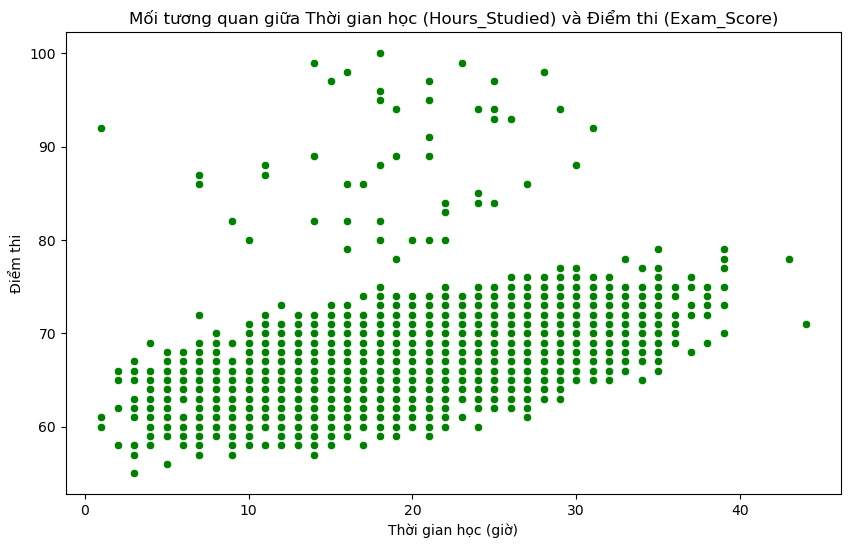

In [9]:
# Vẽ biểu đồ scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df_clean, color='green')  
plt.title('Mối tương quan giữa Thời gian học (Hours_Studied) và Điểm thi (Exam_Score)')
plt.xlabel('Thời gian học (giờ)')
plt.ylabel('Điểm thi')
plt.show()

- Nhận xét:
    + Xu hướng tăng: Có xu hướng điểm thi tăng dần khi thời gian học tăng, nghĩa là thời gian học nhiều hơn có xu hướng cải thiện kết quả thi. Điều này phù hợp với kỳ vọng rằng học sinh đầu tư nhiều thời gian vào học tập sẽ đạt kết quả tốt hơn.

    + Phân tán và ngoại lệ: Dù có xu hướng tăng, vẫn có sự phân tán nhất định trong dữ liệu. Một số học sinh có thể đạt điểm thấp dù dành nhiều thời gian học (có thể do chất lượng học tập chưa hiệu quả) và ngược lại, một số học sinh vẫn đạt điểm cao với thời gian học ít hơn (có thể do kỹ năng tự học hoặc nền tảng kiến thức tốt).

    + Độ dốc nhẹ: Mối tương quan này không quá chặt chẽ, chỉ ra rằng ngoài thời gian học, các yếu tố khác cũng có thể ảnh hưởng lớn đến kết quả thi, chẳng hạn như chất lượng giảng dạy, động lực học, và khả năng tiếp thu.

- Kết luận: Biểu đồ cho thấy thời gian học có ảnh hưởng đến kết quả thi, nhưng không phải là yếu tố duy nhất quyết định điểm số. Các biện pháp hỗ trợ học tập hiệu quả và chiến lược học phù hợp sẽ có thể tối ưu hóa thời gian học và cải thiện kết quả thi tốt hơn.

### Câu 5: Khả năng tiếp cận tới nguồn lực và chất lượng giáo viên ảnh hưởng thế nào đến  việc học của học sinh.

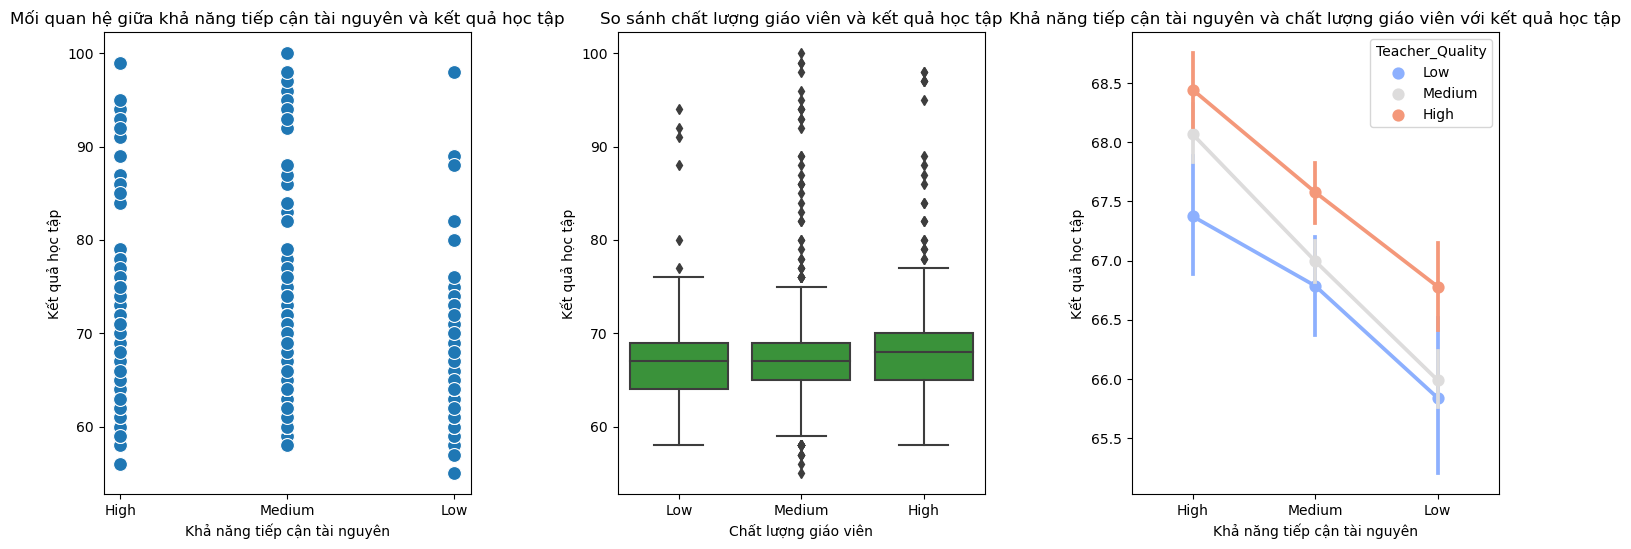

In [10]:
# Tạo một khung chứa ba biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'wspace': 0.4})

# 1. Biểu đồ phân tán: Khả năng tiếp cận tài nguyên và kết quả học tập
sns.scatterplot(data=df_clean, x='Access_to_Resources', y='Exam_Score', color='#1f77b4', s=100, ax=axes[0])
axes[0].set_title("Mối quan hệ giữa khả năng tiếp cận tài nguyên và kết quả học tập")
axes[0].set_xlabel("Khả năng tiếp cận tài nguyên")
axes[0].set_ylabel("Kết quả học tập")

# 2. Biểu đồ hộp: Chất lượng giáo viên và kết quả học tập
sns.boxplot(data=df_clean, x='Teacher_Quality', y='Exam_Score', color='#2ca02c', ax=axes[1])
axes[1].set_title("So sánh chất lượng giáo viên và kết quả học tập")
axes[1].set_xlabel("Chất lượng giáo viên")
axes[1].set_ylabel("Kết quả học tập")

# 3. Biểu đồ điểm: Khả năng tiếp cận tài nguyên và chất lượng giáo viên đối với kết quả học tập
sns.pointplot(data=df_clean, x="Access_to_Resources", y="Exam_Score", hue="Teacher_Quality", palette="coolwarm", ax=axes[2])
axes[2].set_title("Khả năng tiếp cận tài nguyên và chất lượng giáo viên với kết quả học tập")
axes[2].set_xlabel("Khả năng tiếp cận tài nguyên")
axes[2].set_ylabel("Kết quả học tập")

plt.show()

- Nhận xét
    + Ở biểu đồ phân tán, ta thấy rằng học sinh có khả năng tiếp cận tài nguyên tốt hơn thường đạt điểm số cao hơn. Tuy nhiên, sự khác biệt không rõ ràng ở các nhóm với mức tiếp cận tài nguyên khác nhau
    + Ở biểu đồ hộp, học sinh được giảng dạy vởi giáo viên có chất lượng tốt có xu hướng hướng đạt điểm cao hơn.
    + Ở biểu đồ điểm cho thấy khả năng tiếp cận tài nguyên, chất lượng giáo viên tỉ lệ thuận với điểm số của học sinh. Học sinh có khả năng tiếp cận tài nguyên tốt hơn và giáo viên chất lượng cao thường đạt kết quả tốt nhất.

- Kết luận: Khả năng tiếp cận tài nguyên và chất lượng giáo viên đều có tác động đến kết quả học tập của học sinh. Tuy nhiên mức độ ảnh hưởng của từng yếu tố có thể thay đổi tùy thuộc vào mức độ hiện diện của yếu tố còn lại.

### Câu 6: Mức độ động lực học tập có ảnh hưởng đến sự tiến bộ của học sinh không?

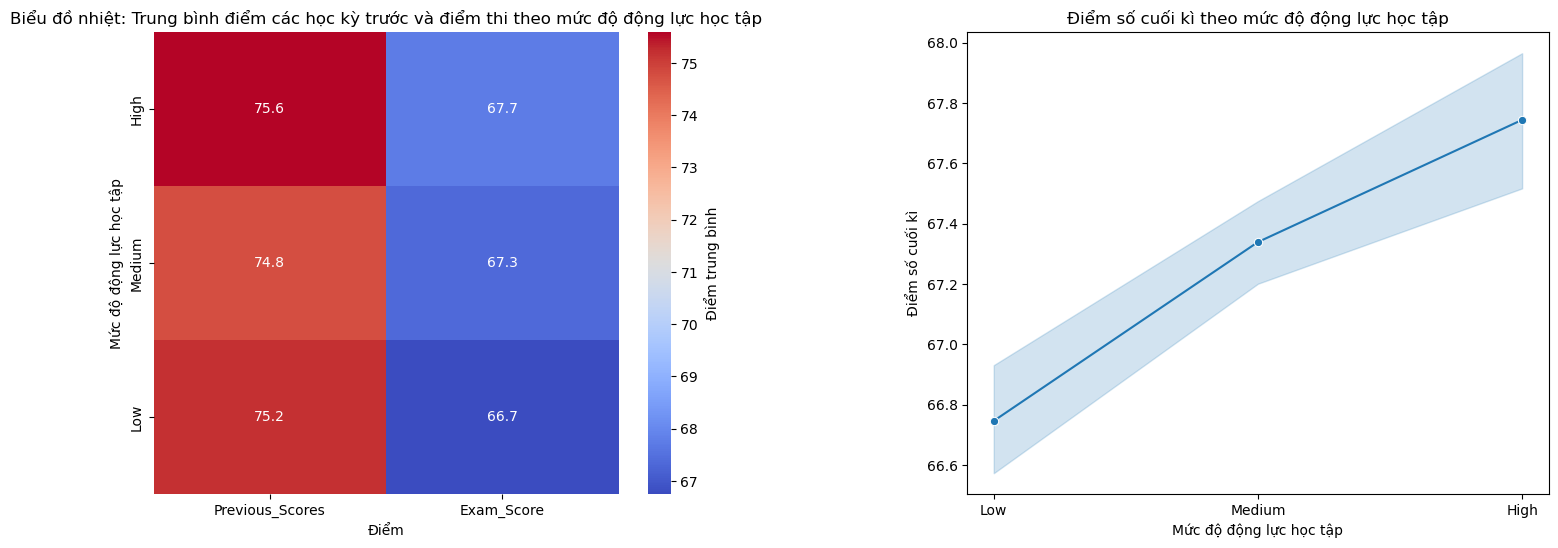

<Figure size 1000x600 with 0 Axes>

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.4})

# 1. Biểu đồ heatmap: Điểm số trung bình các kỳ trước và điểm cuối kỳ theo mức độ động lực học tập
mean_scores = df_clean.groupby('Motivation_Level').agg({
    'Previous_Scores': 'mean',
    'Exam_Score': 'mean'
}).reset_index()

# Đặt lại thứ tự hàng, chuyển "Low" xuống dưới cùng
mean_scores['Motivation_Level'] = pd.Categorical(mean_scores['Motivation_Level'],
                                                  categories=['High', 'Medium', 'Low'], 
                                                  ordered=True)

# Tạo ma trận cho heatmap
heatmap_data = mean_scores.set_index('Motivation_Level')

# Sắp xếp lại heatmap_data theo thứ tự mong muốn
heatmap_data = heatmap_data.reindex(['High', 'Medium', 'Low'])

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Điểm trung bình'}, ax=axes[0])
axes[0].set_title("Biểu đồ nhiệt: Trung bình điểm các học kỳ trước và điểm thi theo mức độ động lực học tập")
axes[0].set_xlabel("Điểm")
axes[0].set_ylabel("Mức độ động lực học tập")

# 2. Biểu đồ đường: Điểm số cuối kỳ theo mức độ động lực học tập
sns.lineplot(data=df_clean, x='Motivation_Level', y='Exam_Score', marker='o', color='#1f77b4', ax=axes[1])
axes[1].set_title("Điểm số cuối kì theo mức độ động lực học tập")
axes[1].set_xlabel("Mức độ động lực học tập")
axes[1].set_ylabel("Điểm số cuối kì")

# Hiện biểu đồ
plt.show()

- Nhận xét:
    + Ở biểu đồ thứ nhất cho thấy rằng điểm trung bình các học kì trước của học sinh khi có động lực học tập cao thì cũng có điểm số cao hơn một chút so với mức độ động lực học tập thấp hơn, nhưng nhìn chung không có sự chênh lệch rõ rệt giữa các mức độ động lực học tập. Ở phần điểm cuối kỳ so với động lực học tập, thì ta thấy điểm tăng nhẹ so với mức độ động lực học tập từ thấp đến cao.
    + Ở biểu đồ thứ hai, biểu đồ đường cho ta thấy sự biến thiên rõ ràng hơn, học sinh có xu hướng điểm cao hơn một chút khi có động lực học tập cao hơn.

- Kết luận: Điểm số của học sinh sẽ có hướng cao hơn khi động lực học cao hơn.


### Câu 7: Liệu có mối tương quan nào giữa giới tính và thành tích học tập?

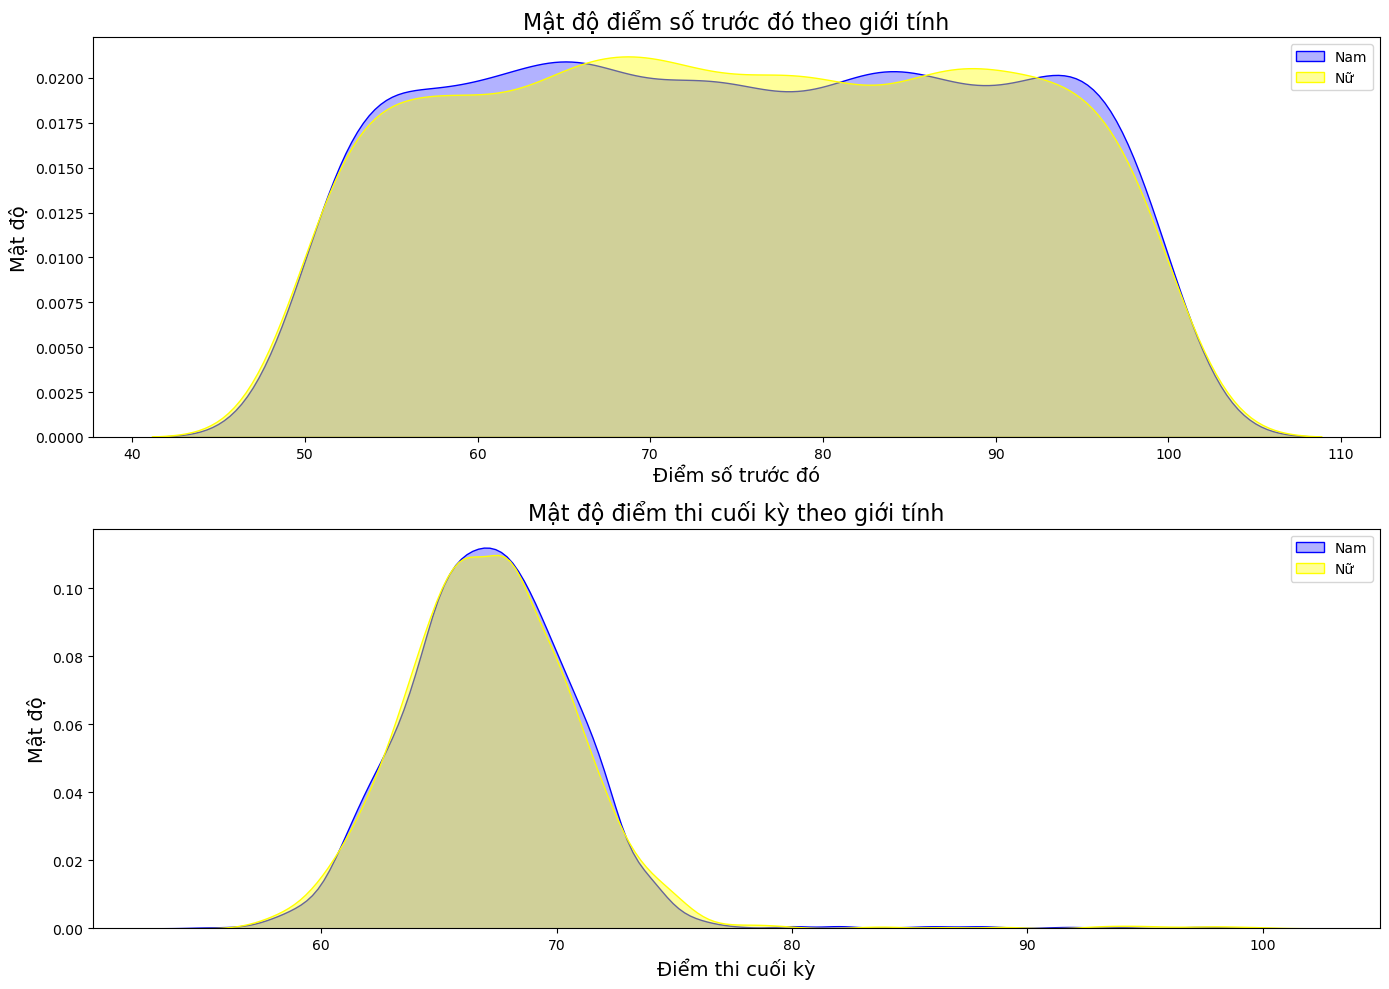

In [12]:
plt.figure(figsize=(14, 10))

# 1. Biểu đồ mật độ: Giới tính và điểm số trước đó
plt.subplot(2, 1, 1)
sns.kdeplot(data=df_clean[df_clean['Gender'] == 'Male'], x='Previous_Scores', fill=True, common_norm=False,
             color='blue', alpha=0.3, label='Nam')
sns.kdeplot(data=df_clean[df_clean['Gender'] == 'Female'], x='Previous_Scores', fill=True, common_norm=False,
             color='yellow', alpha=0.4, label='Nữ')
plt.title('Mật độ điểm số trước đó theo giới tính', fontsize=16)
plt.xlabel('Điểm số trước đó', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend()

# 2. Biểu đồ mật độ: Giới tính và điểm thi cuối kỳ
plt.subplot(2, 1, 2)
sns.kdeplot(data=df_clean[df_clean['Gender'] == 'Male'], x='Exam_Score', fill=True, common_norm=False,
             color='blue', alpha=0.3, label='Nam')
sns.kdeplot(data=df_clean[df_clean['Gender'] == 'Female'], x='Exam_Score', fill=True, common_norm=False,
             color='yellow', alpha=0.4, label='Nữ')
plt.title('Mật độ điểm thi cuối kỳ theo giới tính', fontsize=16)
plt.xlabel('Điểm thi cuối kỳ', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

- Nhận xét: Biểu đồ mật độ cho thấy sự phân bố điểm số của cả nam và nữ khá tương đồng. Điều này cho thấy không có sự khác biệt rõ rệt trong thành tích học tập giữa hai giới tính.
- Kết luận: Kết quả này cho thấy rằng giới tính không phải là yếu tố quyết định đáng kể đến thành tích học tập. Các yếu tố khác như chất lượng giáo viên, và điều kiện học tập có thể có ảnh hưởng lớn hơn đến điểm số của học sinh.

### Câu 8: Giấc ngủ và các hoạt động thể chất ảnh hưởng như thế nào đến thành tích học tập?

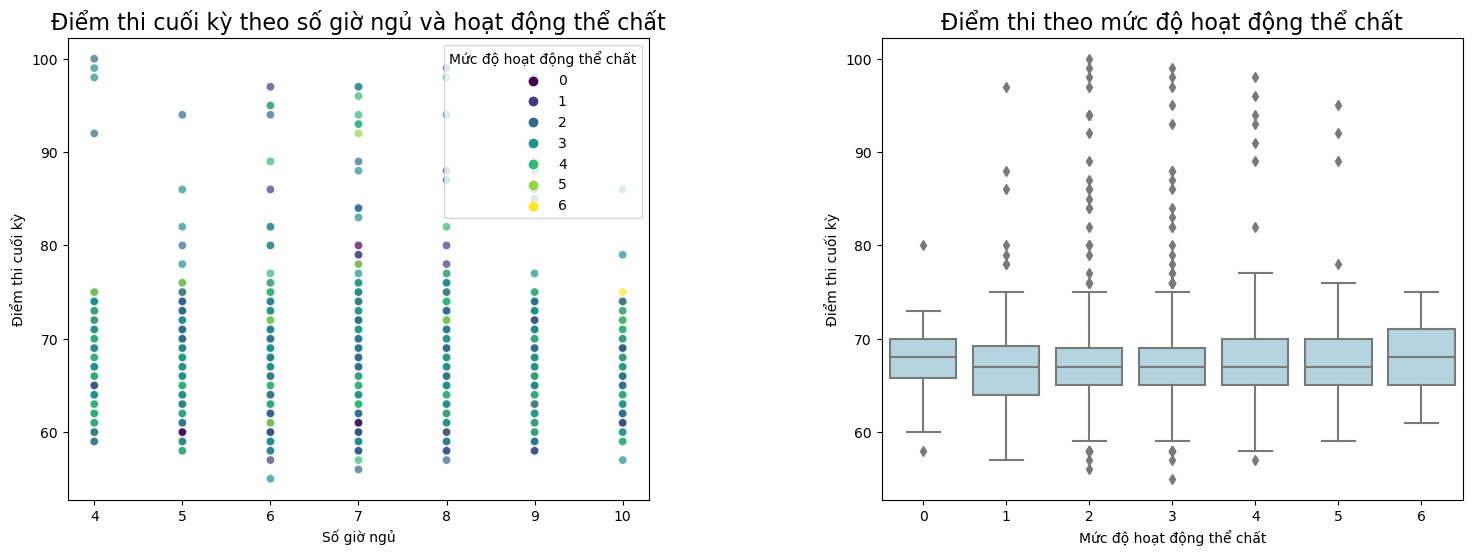

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.4})

sns.scatterplot(data=df_clean, x='Sleep_Hours', y='Exam_Score', hue='Physical_Activity', palette='viridis', alpha=0.7, ax = axes[0])
axes[0].set_title('Điểm thi cuối kỳ theo số giờ ngủ và hoạt động thể chất', fontsize=16)
axes[0].set_xlabel('Số giờ ngủ')
axes[0].set_ylabel('Điểm thi cuối kỳ')
axes[0].legend(title='Mức độ hoạt động thể chất', loc='upper right')

sns.boxplot(data=df_clean, x='Physical_Activity', y='Exam_Score', color='lightblue', ax = axes[1])  # dùng color thay cho palette
axes[1].set_title('Điểm thi theo mức độ hoạt động thể chất', fontsize=16)
axes[1].set_xlabel('Mức độ hoạt động thể chất')
axes[1].set_ylabel('Điểm thi cuối kỳ')

plt.show()

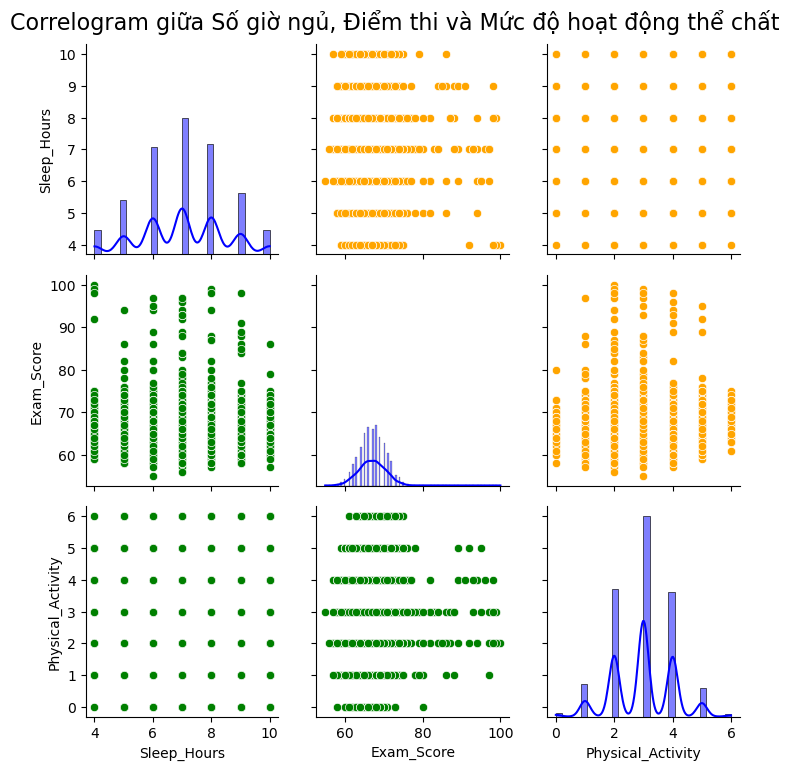

In [20]:
variables = ['Sleep_Hours', 'Exam_Score', 'Physical_Activity']

g = sns.PairGrid(df_clean[variables])
g.map_diag(sns.histplot, kde=True, color='blue')
g.map_upper(sns.scatterplot, color='orange')
g.map_lower(sns.scatterplot, color='green')

plt.suptitle('Correlogram giữa Số giờ ngủ, Điểm thi và Mức độ hoạt động thể chất', y=1.02, fontsize=16)

plt.show()

- Nhận xét:

- Kết luận